In [4]:
# load packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Read csv files
client = pd.read_csv('clients.csv')
nps_main = pd.read_csv('nps_main.csv')

In [6]:
nps_main.head()


,id,dt,nps_val,clnt_id
0,nps_20_1,2020-08-07,8,241fc60e21287c1535956694d8b7aea5
1,nps_20_2,2020-08-03,9,403833a75aeef31f843f2bf99229e443
2,nps_20_3,2020-08-03,10,3cb512bc6b731a84ecb192906b6855a6
3,nps_20_5,2020-08-08,7,9f942c054e602b38be51f44cf35ca468
4,nps_20_7,2020-08-12,9,093e70d41ecf84097a4acf8eb338469a


In [7]:
client.head()

,id,name,type,location
0,148c2b5c1775f3730b48c12f78875c01,61ab0c31eda41b7221e49dab640792ee,smb,prov_6
1,32c5d7050fe8af48113ef74f6a69e28a,f7979f601627be7572a2da2300622732,smb,prov_6
2,84d96e01baed384d82e62e6dd3acdeb2,b24b6b01188f21b1570a90180b6b7552,maj,prov_9
3,8b3bdc1fccf6b4fc0fcb7b6607b1b25d,de079930916c8f63b4dc0f2b8d9596d4,smb,prov_5
4,b054c357e6f8b809a705dccae48f7b29,5476f58c177d25f1e95259ef0939d395,mm,prov_9


In [8]:
print(nps_main.index)

RangeIndex(start=0, stop=964, step=1)


In [9]:
# Merge np_main to client on 'id = clnt_id'

df = nps_main.merge( client, how = 'inner', left_on = 'clnt_id', right_on = 'id')

In [10]:
print(df.columns)

Index(['id_x', 'dt', 'nps_val', 'clnt_id', 'id_y', 'name', 'type', 'location'], dtype='object')


In [11]:
df.head()

,id_x,dt,nps_val,clnt_id,id_y,name,type,location
0,nps_20_1,2020-08-07,8,241fc60e21287c1535956694d8b7aea5,241fc60e21287c1535956694d8b7aea5,7daf0bd75f47046b3b1ecf0c4aa6ba32,smb,prov_5
1,nps_20_135,2020-08-16,10,241fc60e21287c1535956694d8b7aea5,241fc60e21287c1535956694d8b7aea5,7daf0bd75f47046b3b1ecf0c4aa6ba32,smb,prov_5
2,nps_20_2,2020-08-03,9,403833a75aeef31f843f2bf99229e443,403833a75aeef31f843f2bf99229e443,61de994b5dddb37ee88519ff51b0a77a,smb,prov_3
3,nps_20_3,2020-08-03,10,3cb512bc6b731a84ecb192906b6855a6,3cb512bc6b731a84ecb192906b6855a6,3d04ce930b9bdd67ad1982abb3872fad,maj,prov_4
4,nps_20_5,2020-08-08,7,9f942c054e602b38be51f44cf35ca468,9f942c054e602b38be51f44cf35ca468,2f7b360f63f9dfd3306b0b1aef6986b3,mm,prov_3


In [12]:
# compute df['year'] to date time format
df['year'] = pd.to_datetime(df['dt'], infer_datetime_format = True,
                                          errors = 'coerce')

In [13]:
# Extract for year

df['year'] = df['year'].dt.strftime("%Y")


In [14]:
# create ['category'] based on bins 0-6: detractors, 7-8: passives, 9-10: promoters
df['category'] = pd.cut(df['nps_val'], bins = [0,6,8,10], labels = ['detractors', 'passives', 'promoters'])

In [15]:
df['category']

0        passives
1       promoters
2       promoters
3       promoters
4        passives
          ...    
959     promoters
960    detractors
961    detractors
962    detractors
963     promoters
Name: category, Length: 964, dtype: category
Categories (3, object): ['detractors' < 'passives' < 'promoters']

In [16]:
# smb type
df_smb = df[df['type'] == 'smb']

In [17]:
# mm type
df_mm = df[df['type'] == 'mm']

In [18]:
# year 2020 combined
df_2020 = df[df['year'] == '2020']

In [19]:
# year 2021 combined
df_2021 = df[df['year'] == '2021']

In [20]:
# mm 2020 and 2021
df_mm_2020 = df_2020[df_2020['type'] == 'mm']
df_mm_2021= df_2021[df_2021['type'] == 'mm']

In [21]:
# smb 2020 and 2021
df_smb_2020 = df_2020[df_2020['type'] == 'smb']
df_smb_2021= df_2021[df_2021['type'] == 'smb']

# Smb and mm group comparison


In [22]:
# Cross tab counts
pd.crosstab(df['category'], df['year'])

year,2020,2021
category,,
detractors,39,128
passives,64,231
promoters,103,390


In [23]:
# Cross tab proportions
pd.crosstab(df['category'], df['year'] ,  normalize = 'columns')

year,2020,2021
category,,
detractors,0.18932,0.170895
passives,0.31068,0.308411
promoters,0.50000,0.520694


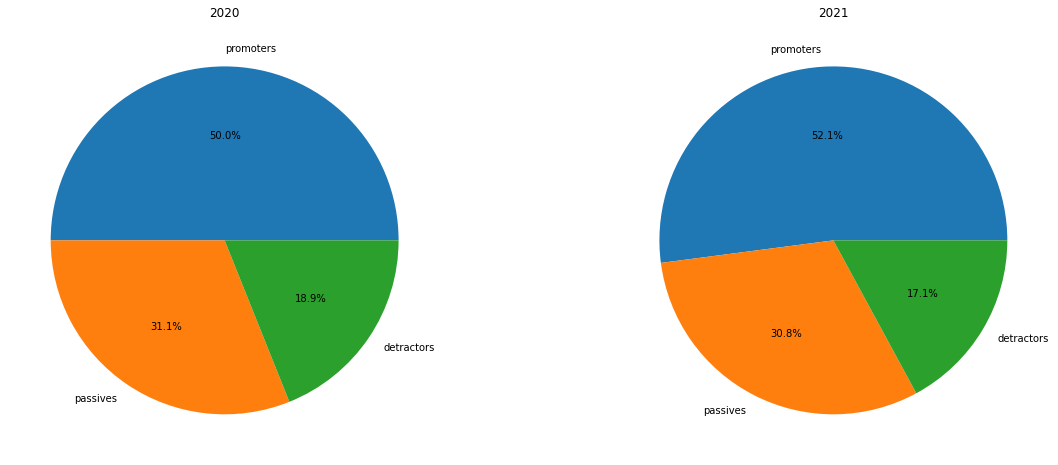

In [25]:
# 2020 to 2021 proportion comparison

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
df_2020['category'].value_counts().plot(kind = 'pie', ylabel = '', radius = 1, autopct='%1.1f%%', ax=ax1)
df_2021['category'].value_counts().plot(kind = 'pie', ylabel = '', radius = 1, autopct='%1.1f%%', ax=ax2)
ax1.title.set_text('2020')
ax2.title.set_text('2021')
plt.show()


- The number of promoters increased from 103 in 2020 to 390 in 2021.
- The number of non-promoters were 103 in 2020, and 359 in 2021.
- The number of proportion of promoters increased from 50% in 2020 to 52% in 2021.


# Smb and mm comparison by year

In [26]:
# cross tab mm only
pd.crosstab(df_mm['category'], df_mm['year'])

year,2020,2021
category,,
detractors,16,78
passives,28,143
promoters,34,192


In [27]:
# cross tab mm only
pd.crosstab(df_mm['category'], df_mm['year'], normalize = 'columns')

year,2020,2021
category,,
detractors,0.205128,0.188862
passives,0.358974,0.346247
promoters,0.435897,0.464891


In [28]:
# cross tab smb only
pd.crosstab(df_smb['category'], df_smb['year'])

year,2020,2021
category,,
detractors,13,19
passives,20,34
promoters,44,88


In [29]:
# cross tab smb only
pd.crosstab(df_smb['category'], df_smb['year'], normalize = 'columns')

year,2020,2021
category,,
detractors,0.168831,0.134752
passives,0.259740,0.241135
promoters,0.571429,0.624113


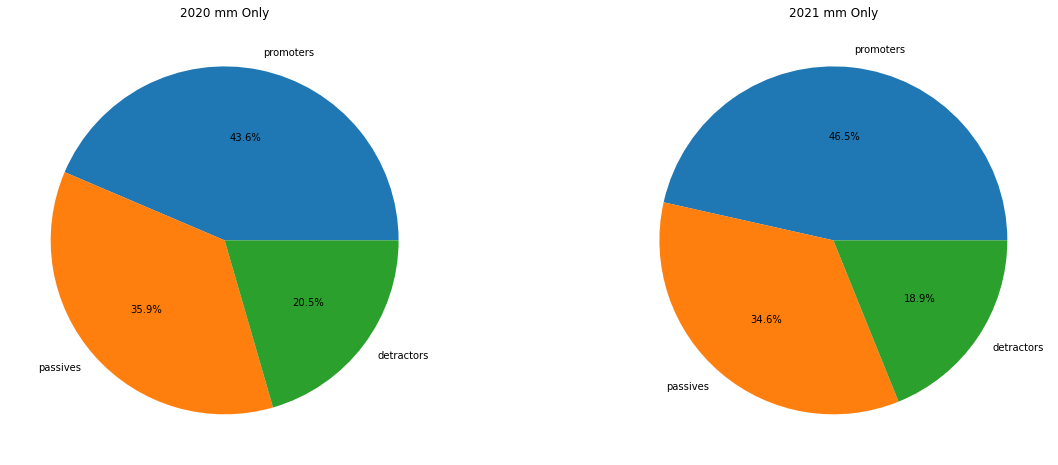

In [30]:
# 2020 to 2021 mm only proportion comparison

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
df_mm_2020['category'].value_counts().plot(kind = 'pie', ylabel = '', radius = 1, autopct='%1.1f%%', ax=ax1)
df_mm_2021['category'].value_counts().plot(kind = 'pie', ylabel = '', radius = 1, autopct='%1.1f%%', ax=ax2)
ax1.title.set_text('2020 mm Only')
ax2.title.set_text('2021 mm Only')
plt.show()

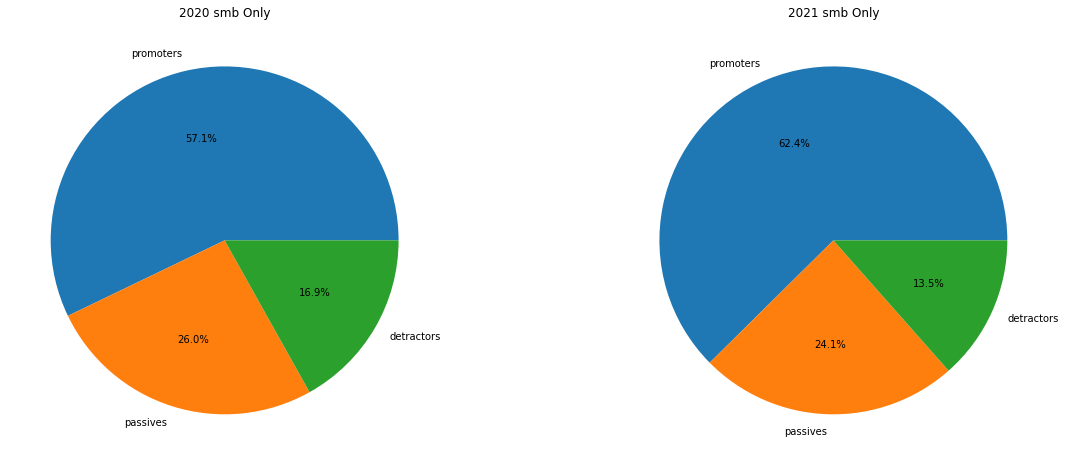

In [31]:
# 2020 to 2021 mm only proportion comparison

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
df_smb_2020['category'].value_counts().plot(kind = 'pie', ylabel = '', radius = 1, autopct='%1.1f%%', ax=ax1)
df_smb_2021['category'].value_counts().plot(kind = 'pie', ylabel = '', radius = 1, autopct='%1.1f%%', ax=ax2)
ax1.title.set_text('2020 smb Only')
ax2.title.set_text('2021 smb Only')
plt.show()

In [39]:
# summary statistics for mm in 2020 and 2021


print('2020 mm nps_val mean:',df_mm_2020['nps_val'].mean())
print('2021 mm nps_val mean:',df_mm_2021['nps_val'].mean())

# summary statistics for mm in 2020 and 2021


print('2020 smb nps_val mean:',df_smb_2020['nps_val'].mean())
print('2021 smb nps_val mean:',df_smb_2021['nps_val'].mean())

2020 mm nps_val mean: 7.7974683544303796
2021 mm nps_val mean: 8.011990407673862
2020 smb nps_val mean: 8.337662337662337
2021 smb nps_val mean: 8.391608391608392


# Findings

- It appears that the proportions of promoters has increased from 2020 to 2021 for both mm and smb types.
- The smb type appears to have a greater increase in the proportion of promoters than that of the mm types.
- There is an increase in the nps val in the mm group, and a slight increase from the smb group
- For next steps, I would focus on figuring out why mm did not receive an increase in promoters over the years. 
- For example, looking at whether the location of the respondent / demographic factors play a role in the change of promoters over the years for mm and smb types.
- Using a a statistical test to further examine whether the increase in nps val from 2020 to 2021 is significant
